In [110]:
using DataFrames, CSV, Plots, Clustering

## 数据

,street,city,zip,state,beds,baths,sq__ft,type
,String,String,Int64,String,Int64,Int64,Int64,String
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential


Symbol[:street, :city, :zip, :state, :beds, :baths, :sq__ft, :type, :sale_date, :price, :latitude, :longitude]


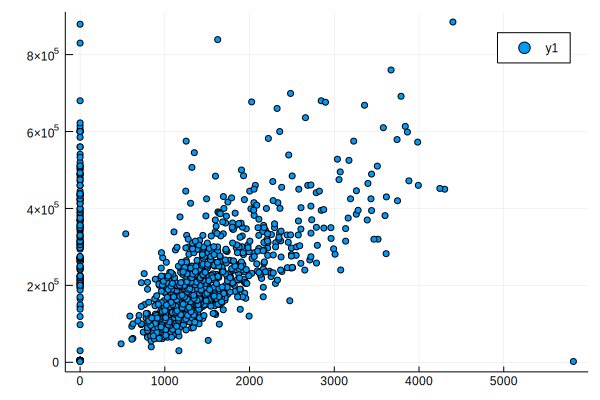

In [35]:
houses = CSV.read("/pnas/liujiang_group/yinyao/data/ml/houses.csv")
display(first(houses, 5))
println(names(houses))
plot(size = (500, 500), leg = false)
x = houses[:, :sq__ft]
y = houses[:, :price]
scatter(x, y, markersize = 3)

# 过滤数据

,street,city,zip,state,beds,baths,sq__ft,type
,String,String,Int64,String,Int64,Int64,Int64,String
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential


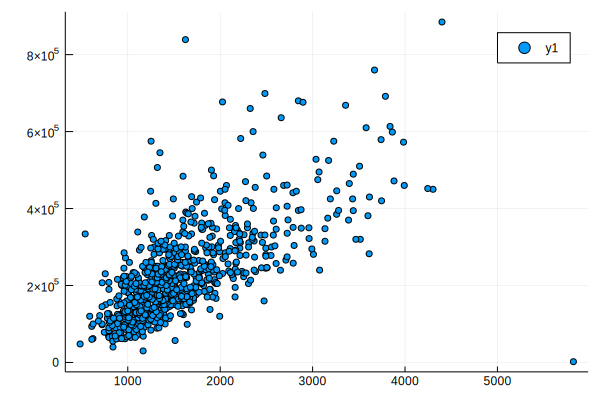

In [37]:
filter_houses = houses[houses[:, :sq__ft] .> 0, :]
display(first(filter_houses, 5))
plot(size = (500, 500), leg = false)
x = filter_houses[:, :sq__ft]
y = filter_houses[:, :price]
scatter(x, y, markersize = 3)

In [78]:
X = filter_houses[:, [:latitude, :longitude]]
display(first(X, 5))
X = convert(Matrix, X);

,latitude,longitude
,Float64,Float64
1,38.6319,-121.435
2,38.4789,-121.431
3,38.6183,-121.444
4,38.6168,-121.439
5,38.5195,-121.436


In [109]:
k = length(unique(filter_houses[:, :zip])) # 假设需要的类别数
# k = Int(k // 6)
C = kmeans(X', k);

,cluster,city,latitude,longitude,zip
,Int64,String,Float64,Float64,Int64
1,37,SACRAMENTO,38.6319,-121.435,95838
2,43,SACRAMENTO,38.4789,-121.431,95823
3,4,SACRAMENTO,38.6183,-121.444,95815
4,4,SACRAMENTO,38.6168,-121.439,95815
5,56,SACRAMENTO,38.5195,-121.436,95824


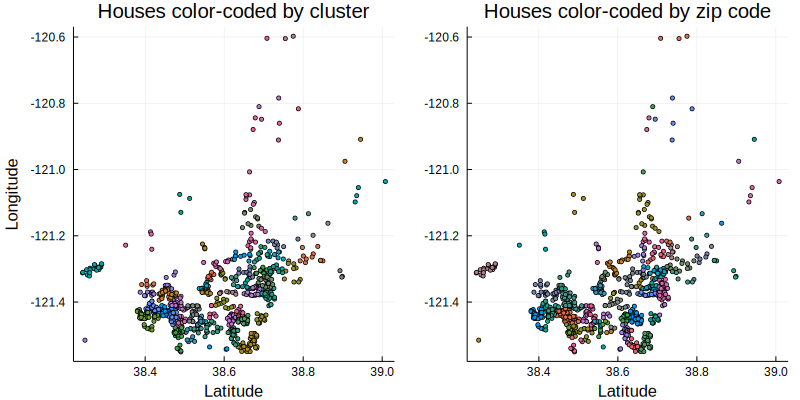

In [108]:
df = DataFrame(
    cluster = C.assignments, 
    city = filter_houses[:, :city], 
    latitude = filter_houses[:, :latitude],
    longitude = filter_houses[:, :longitude],
    zip = filter_houses[:, :zip]
)
display(first(df, 5))
clusters_figure = plot()
for i = 1:k
    clustered_houses = df[df[:, :cluster] .== i, :]
    xvals = clustered_houses[:, :latitude]
    yvals = clustered_houses[:, :longitude]
    scatter!(clusters_figure, xvals, yvals, markersize = 2)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by cluster")

unique_zips = unique(filter_houses[:, :zip])
zips_figure = plot()
for uzip in unique_zips
    subs = filter_houses[filter_houses[:, :zip] .== uzip, :]
    x = subs[:, :latitude]
    y = subs[:, :longitude]
    scatter!(zips_figure, x, y, markersize = 2)
end
xlabel!("Latitude")
title!("Houses color-coded by zip code")

plot(clusters_figure, zips_figure, layout = (1, 2), size = (800, 400), leg = false)